### 파이썬 시각화 도구

    - Matplotlib : 기본 시각화 도구

    - Seaborn
    
    
### 자료 형식에 따라 통계적 접근과 시각화 방법 다르다

    - 양적 데이터 : 수치적 의미(이산형-셀 수 있다 vs 연속형-셀 수 없다)

    - 질적(명목) 데이터 : 수치적 의미x

# Matplotlib

1) 질적 데이터
    
    요약 방법 : 도표
    
    정리 방법 : 도수분포표(빈도수). 분할표
    
    그래프 작성 : 막대그래프(빈도수, 연속적 비율). 파이그래프...

2) 양적 데이터
    
    요약 방법 : 수치
    
    정리 방법 : 산술 평균. 중앙값...
    
    그래프 작성 : 히스토그램. Boxplot(상자도표). 시계열그래프. 산포도(산점도)
    
3) 기본 그래프

    선, 막대(두 변수 간의 빈도), 히스토그램(한 변수에 대한 빈도수), 산포도(두 변수 간의 관계), 상자
    
4) 참고 사이트

    https://matplotlib.org/gallery.html

In [1]:
import numpy as np

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt  # 기본 그래프 작성에 가장 많이 사용

import seaborn as sns  # 그래프 시각화 향상

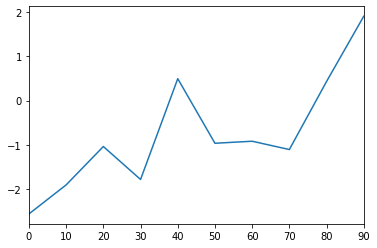

In [8]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))  # cumsum() : 누적 합계
s

s.plot()  # plot() : matplotlib 없이도 기본 그래프 작성해주는 메서드

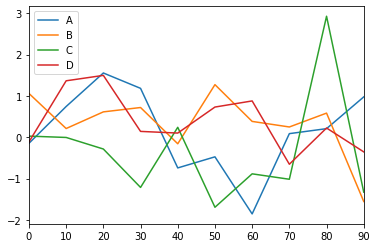

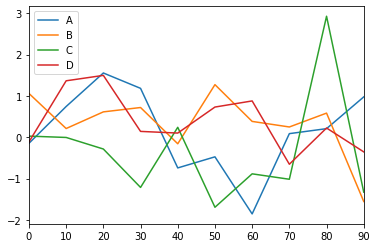

In [41]:
df1 = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"], index=np.arange(0, 100, 10))
df1

df1.plot()
df1.plot.line()

In [109]:
# 일반 그래프에서 한글 출력

import matplotlib.font_manager as fm

font_name = fm.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family = font_name)
mpl.rcParams['axes.unicode_minus'] = False

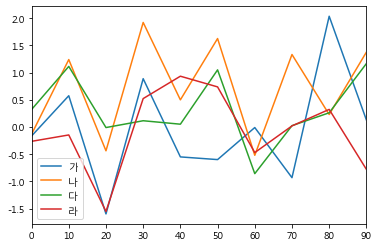

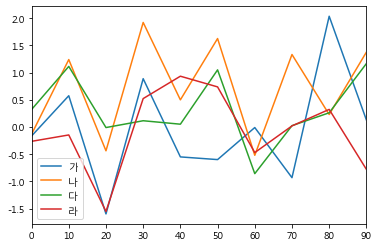

In [110]:
df1 = pd.DataFrame(np.random.randn(10, 4), columns=["가", "나", "다", "라"], index=np.arange(0, 100, 10))
df1

df1.plot()
df1.plot.line()

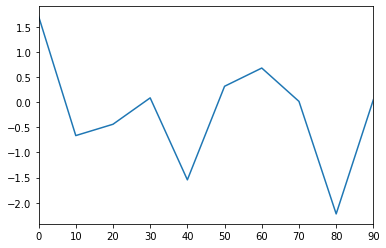

In [13]:
df1["B"].plot()  # DataFrame 중 하나의 Series만 추출하여 그래프 작성 가능

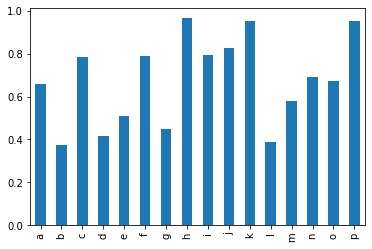

In [42]:
s2 = pd.Series(np.random.rand(16), index=list("abcdefghijklmnop"))  # 각각의 라벨이 있다 = 빈도가 있다(막대그래프로 작성)
s2

s2.plot(kind="bar")  # kind 옵션 통해 막대그래프 작성
s2.plot.bar()

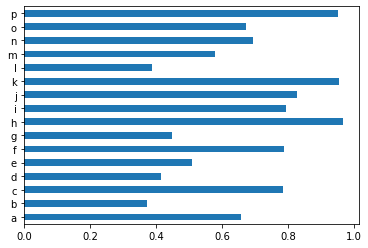

In [43]:
s2.plot(kind="barh")  # 수직 막대그래프
s2.plot.barh()

In [22]:
df2 = pd.DataFrame(np.random.rand(6, 4), index=["one", "two", "three", "four", "five", "six"],
                   columns=pd.Index(["A", "B", "C", "D"], name="Genus"))  # Index() 메서드 통해 한번에 컬럼명과 컬럼 name 부여
df2

Genus,A,B,C,D
one,0.401260,0.929291,0.099615,0.945302
two,0.869489,0.454162,0.326701,0.232744
three,0.614465,0.033075,0.015606,0.428796
four,0.068074,0.251941,0.221161,0.253191
five,0.131055,0.012036,0.115484,0.618480
six,0.974256,0.990345,0.409054,0.162954


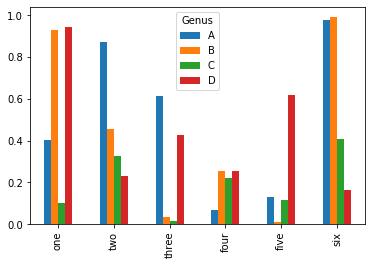

In [23]:
df2.plot(kind="bar")  # 컬럼명=범례

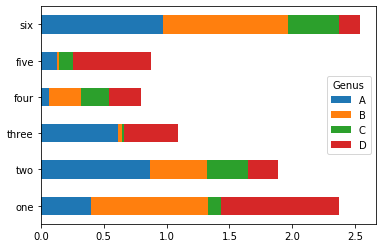

In [25]:
df2.plot(kind="barh", stacked=True)  # 하나의 막대로 값 표현

## 히스토그램

    - x 변수가 가질 수 있는 값의 구간
    
    - 값만 필요하고 인덱스는 필요x
    
    - 수치를 연속적으로 나타날 때 사용(막대그래프와 달리 막대 사이에 공간x)

In [27]:
s3 = pd.Series(np.random.normal(0, 1, size=100))  # 이전과 달리 인덱스 부여x - 히스토그램
s3.head()

0    0.943046
1   -2.739677
2   -0.569312
3    0.269904
4   -0.466846
dtype: float64

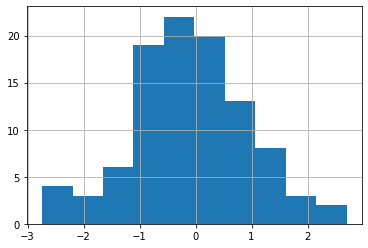

In [28]:
s3.hist()  # 히스토그램 작성

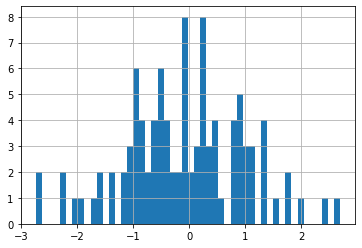

In [29]:
s3.hist(bins=50)  # (막대 개수 조절 가능. default=10)

## 산포도(산점도)

    - 데이터 특징 추출(어느 구간에 더 밀집되어 있는지)
    
    - 데이터 간 상관관계 파악

In [38]:
x1 = np.random.normal(1, 1, size=(100, 1))
x2 = np.random.normal(-2, 4, size=(100, 1))

x = np.concatenate((x1, x2), axis=1)  # 두 데이터를 tuple로 묶어 한 쌍의 데이터로 사용할 수 있도록 연결
print(x[:5])

df3 = pd.DataFrame(x, columns=["x1", "x2"])
df3.head()

[[ 1.02185736 -3.35472874]
 [ 1.04253907  6.13905018]
 [ 2.53093235  2.21671164]
 [ 1.09244774  1.80333479]
 [ 0.90099169  0.23719593]]


,x1,x2
0,1.021857,-3.354729
1,1.042539,6.139050
2,2.530932,2.216712
3,1.092448,1.803335
4,0.900992,0.237196


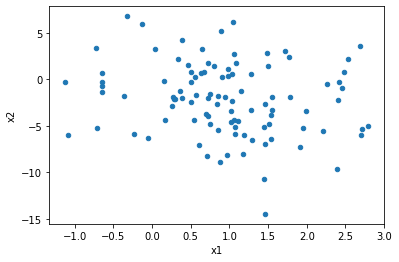

In [39]:
df3.plot.scatter("x1", "x2")

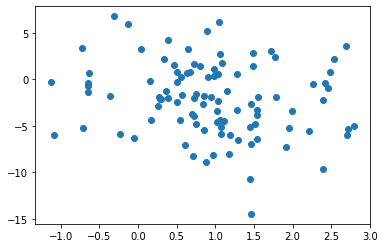

In [40]:
plt.scatter(df3["x1"], df3["x2"])

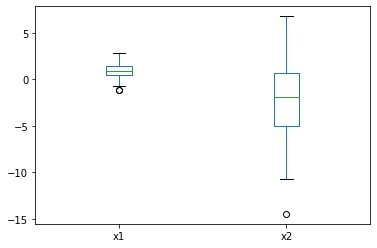

In [44]:
df3.plot.box()  # 상자도표(Boxplot) : 데이터 최대값, 최소값, 중앙값, 이상치 확인 가능

## Matplotlib을 이용한 그래프

In [2]:
tips = sns.load_dataset("tips")  # Seaborn 모듈 안에 있는 예제 "tips"
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0, 0.5, 'Total Bill')

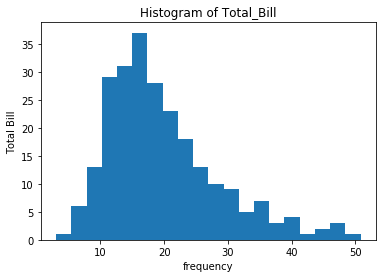

In [48]:
fig = plt.figure()  # 그래프 그리기 위한 공간 준비
ax = fig.add_subplot(1, 1, 1)  # 서브 그래프 추가(1행 1열의 그래프 1개 추가)

# total_bill에 대한 금액 분포 확인 - 한 변수에 대한 빈도수 확인(히스토그램)
ax.hist(tips["total_bill"], bins=20)
ax.set_title("Histogram of Total_Bill")  # 제목 부여
ax.set_xlabel("frequency")  # x축 이름 부여
ax.set_ylabel("Total Bill")  # y축 이름 부여

Text(0, 0.5, 'tip')

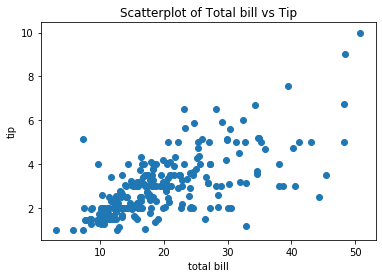

In [53]:
# Tip과 Total_bill의 관계 - 두 변수의 상관관계(산포도)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(tips["total_bill"], tips["tip"])
ax.set_title("Scatterplot of Total bill vs Tip")
ax.set_xlabel("total bill")
ax.set_ylabel("tip")


Text(0, 0.5, 'Tip')

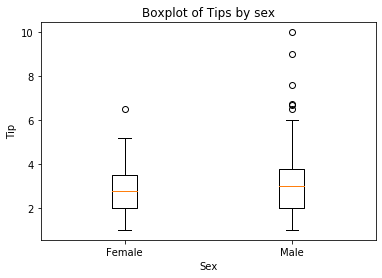

In [67]:
# 성별과 팁의 관계(남성과 팁, 여성과 팁 상관관계) - Boxplot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.boxplot([tips[tips["sex"]=="Female"]["tip"], tips[tips["sex"]=="Male"]["tip"]],
           labels=["Female", "Male"])  # labels 옵션 통해 sex 컬럼의 female과 male 구분

ax.set_title("Boxplot of Tips by sex")
ax.set_xlabel("Sex")
ax.set_ylabel("Tip")

In [13]:
# 성별 색상 구분

def recode_sex(sex):  # 남성과 여성 구분(남성=1, 여성=0)
    if sex == "Female":
        return 3
    else:
        return 4
    
tips["sex_color"] = tips["sex"].apply(recode_sex)  # feature engeeniering : 필요에 맞게 데이터를 조작
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,3
1,10.34,1.66,Male,No,Sun,Dinner,3,4
2,21.01,3.50,Male,No,Sun,Dinner,3,4
3,23.68,3.31,Male,No,Sun,Dinner,2,4
4,24.59,3.61,Female,No,Sun,Dinner,4,3


Text(0, 0.5, 'Tip')

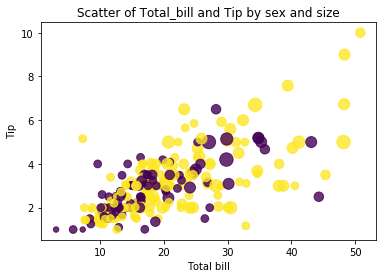

In [17]:
# total bill과 tip의 관계를 성별로 확인 - 산포도 통해 성별을 색상으로 구분

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(tips["total_bill"], tips["tip"], c=tips["sex_color"], s=tips["size"]*30, alpha=0.8)
    # c: 색상 지정 옵션, s: 점 크기 지정 옵션, alpha: 투명도

ax.set_title("Scatter of Total_bill and Tip by sex and size")
ax.set_xlabel("Total bill")
ax.set_ylabel("Tip")

## Seaborn

    참고 사이트 : http://seaborn.pydata.org/

In [18]:
import seaborn as sns

tips = sns.load_dataset("tips")

Text(0, 0.5, 'Frequence')

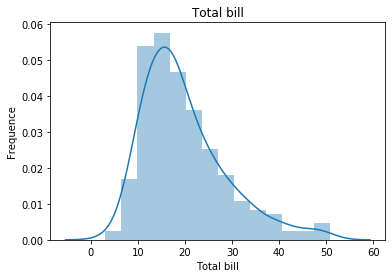

In [20]:
ax = plt.subplots()  # 그래프를 하나 그리겠다(fig + ax)

ax = sns.distplot(tips["total_bill"])  # seaborn 이용한 분포곡선 막대그래프

ax.set_title("Total bill")
ax.set_xlabel("Total bill")
ax.set_ylabel("Frequence")

Text(0, 0.5, 'Frequence')

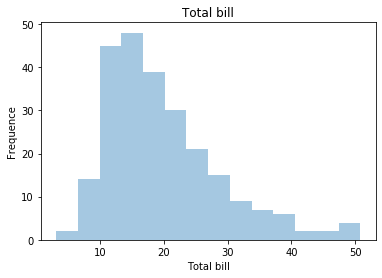

In [21]:
ax = plt.subplots()

ax = sns.distplot(tips["total_bill"], kde=False)  # kde 옵션 통해 분포곡선 제외(Kenel Density Estination : 비모수 추정방법)
    # 모수집단: 정규분포로 이루어진 집단. 비모수 집단: 정규분포 외 집단

ax.set_title("Total bill")
ax.set_xlabel("Total bill")
ax.set_ylabel("Frequence")

Text(0, 0.5, 'Frequence')

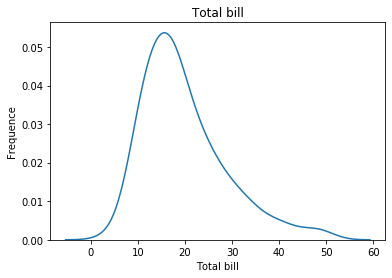

In [22]:
ax = plt.subplots()

ax = sns.distplot(tips["total_bill"], hist=False)  # hist 옵션 통해 막대그래프 제외

ax.set_title("Total bill")
ax.set_xlabel("Total bill")
ax.set_ylabel("Frequence")

Text(0, 0.5, 'Frequence')

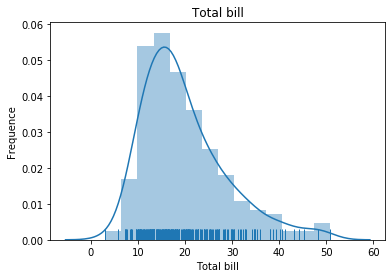

In [23]:
ax = plt.subplots()

ax = sns.distplot(tips["total_bill"], rug=True)  # 그래프 밑에 분포 상황 표시 

ax.set_title("Total bill")
ax.set_xlabel("Total bill")
ax.set_ylabel("Frequence")

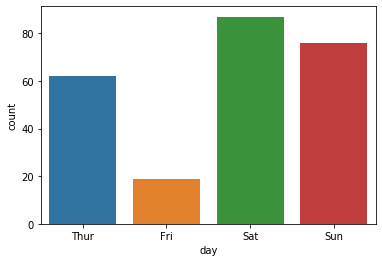

In [24]:
sns.countplot("day", data=tips)  # 요일별로 데이터 개수 파악 후 막대그래프로

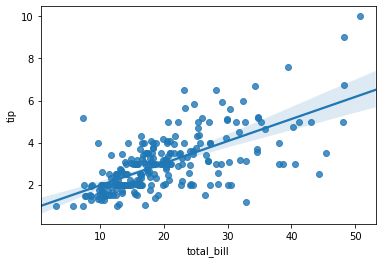

In [25]:
sns.regplot(x="total_bill", y="tip", data=tips)  # 회귀선(분포 파악) + 산포도

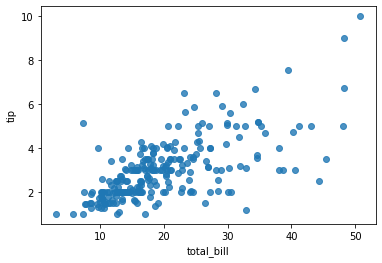

In [26]:
sns.regplot(x="total_bill", y="tip", data=tips, fit_reg=False)  # 산포도에서 회귀선 제외

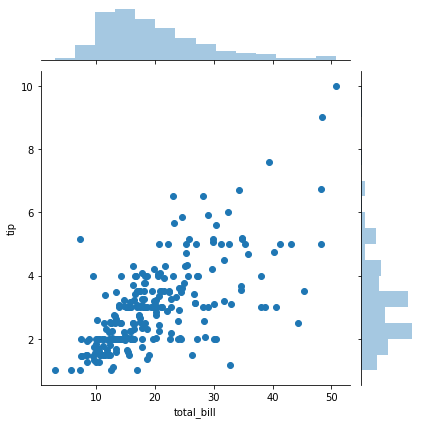

In [28]:
sns.jointplot(x="total_bill", y="tip", data=tips)  # 산포도에 히스토그램 합성

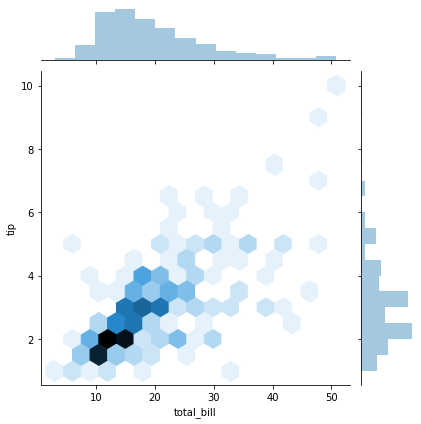

In [30]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")  # kind 옵션 통해 점 모양 변경

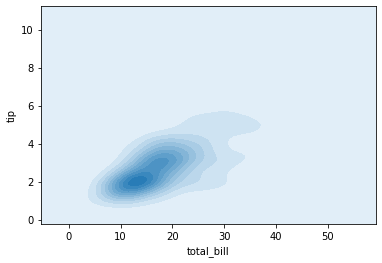

In [32]:
sns.kdeplot(data=tips["total_bill"], data2=tips["tip"], shade=True)  # 분포 등고선으로 표시. shade 옵션 통해 그림자 효과

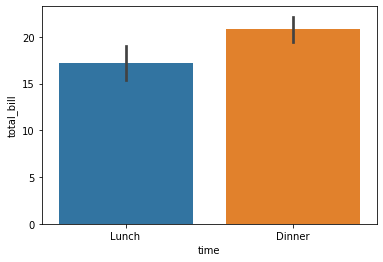

In [33]:
sns.barplot(x="time", y="total_bill", data=tips)  # 시간대에 따른 전체 금액 비교(막대그래프)

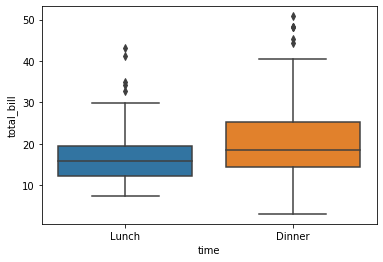

In [34]:
sns.boxplot(x="time", y="total_bill", data=tips)  # 상자그림

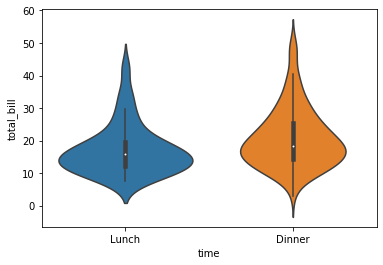

In [35]:
sns.violinplot(x="time", y="total_bill", data=tips)  # 바이올린 그래프: 분포 형태 나타내는 그래프

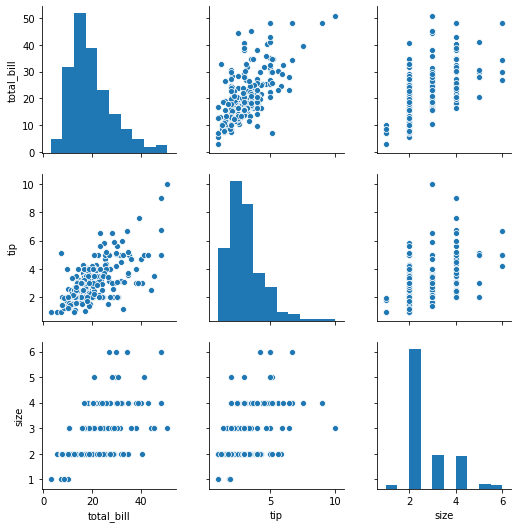

In [36]:
sns.pairplot(tips)  # 모든 변수들에 대한 상관관계 그래프화

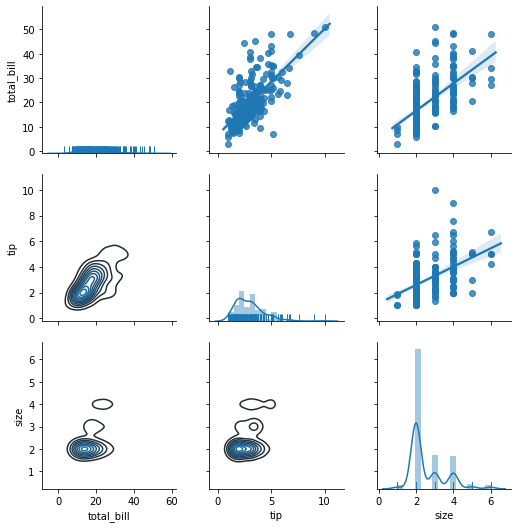

In [42]:
ax = sns.PairGrid(tips)  # 그래프 자리 설정(대각선 기준 upper와 lower에 각자 다른 그래프 표현)
ax = ax.map_upper(sns.regplot)  # upper에 회귀선 산포도
ax = ax.map_lower(sns.kdeplot)  # lower에 분포 등고선
ax = ax.map_diag(sns.distplot, rug=True)  # 대각선에 분포 표시한 막대그래프

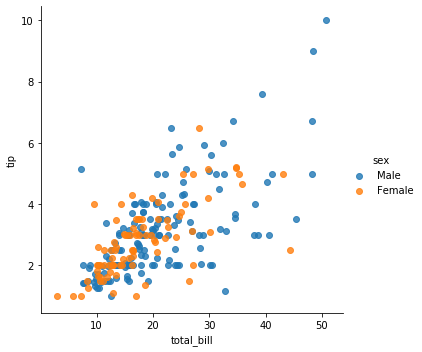

In [44]:
sns.lmplot(x="total_bill", y="tip", hue="sex", data=tips, fit_reg=False)
    # 산포도(데이터 색상별로 표현할 수 있는)

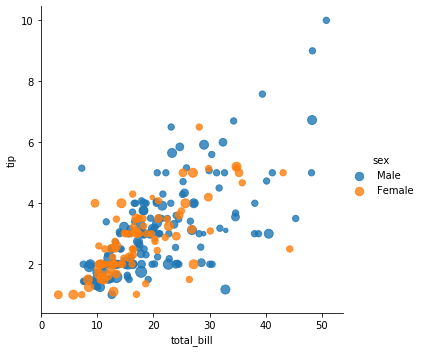

In [47]:
sns.lmplot(x="total_bill", y="tip", hue="sex", data=tips, fit_reg=False,
          scatter_kws={"s":tips["size"]*20})  # 산포도에 관련된 옵션 dict 형태로 추가

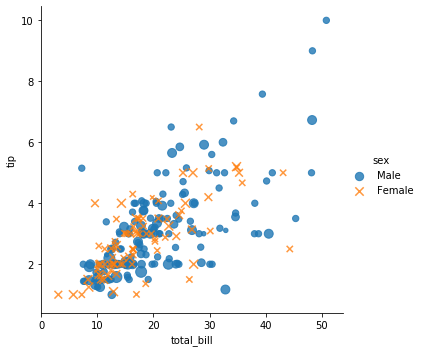

In [48]:
sns.lmplot(x="total_bill", y="tip", hue="sex", data=tips, fit_reg=False,
          scatter_kws={"s":tips["size"]*20}, markers=["o", "x"])  # markers 옵션 통해 점 모양 변경

---

# 지도 시각화

    

In [49]:
!pip install folium

In [50]:
import folium

In [51]:
map = folium.Map(location=[45.5236, -122.6750])  # 지도 그리는 객체 생성(위도와 경도로 위치 정보 넘김)
map

In [52]:
map = folium.Map(location=[37.499657, 127.029673])
map

In [55]:
map = folium.Map(location=[37.499657, 127.029673], zoom_start=25)  # 확대된 모양으로 출력
map = folium.Map(location=[37.499657, 127.029673], tiles="Stamen Toner")  # 흑백 출력
map

In [56]:
state_unemployment = pd.read_csv("data/map/folium_US_Unemployment_Oct2012.csv")
state_unemployment.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [64]:
state_geo = "data/map/folium_us-states.json"  

map = folium.Map(location=[40, -98], zoom_start=4)
map

map.choropleth(geo_data=state_geo)  # choropleth() : 데이터 표시할 위치 레이어
map

map.choropleth(geo_data=state_geo, data=state_unemployment, key_on="feature.id",
              columns=["State", "Unemployment"], fill_color="YlGn")  # 표시할 데이터, 기준 키, 컬럼, 표시색상
map

map.save("data/map/map.html")

In [72]:
# Marker

map = folium.Map(location=[37.499657, 127.029673], zoom_start=15)

folium.Marker(location=[37.497927, 127.027541], popup="강남역", icon=folium.Icon(color="red", icon="star")).add_to(map)

map

In [73]:
# Marker 범위 표시(CircleMarker)

map = folium.Map(location=[37.499657, 127.029673], zoom_start=15)

folium.CircleMarker(location=[37.497927, 127.027541],
                    radius=100, color="#ffffgg", fill_color="#ffffggg", popup="강남역 주변").add_to(map)
map

# WordCloud



In [74]:
!pip install wordcloud

In [75]:
import matplotlib.pyplot as plt  # wordcloud로 분류한 글자 이미지화
from wordcloud import WordCloud, STOPWORDS  # 의미없는 영단어들의 집합(text에서 제외하기 위함: set자료형)

(-0.5, 399.5, 199.5, -0.5)

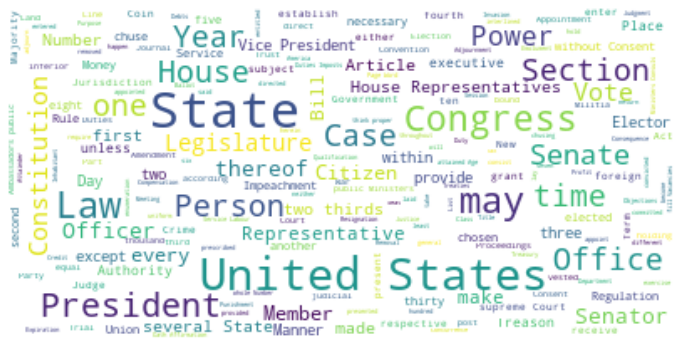

In [83]:
text = open("data/wordcloud/constitution.txt")
text = text.read()

wordcloud = WordCloud(max_font_size=30, background_color="white").generate(text)  
    # max_font_size 옵션: 단어 최대 크기 조정, background_color: 배경색 지정
wordcloud.words_  # 각 단어의 빈도수에 따른 값 출력

plt.figure(figsize=(12, 12))  # 프레임 사이즈 지정
plt.imshow(wordcloud, interpolation="bilinear")  # 보여지는 글자 보정
plt.axis("off")  # 프레임 둘레의 눈금 제거

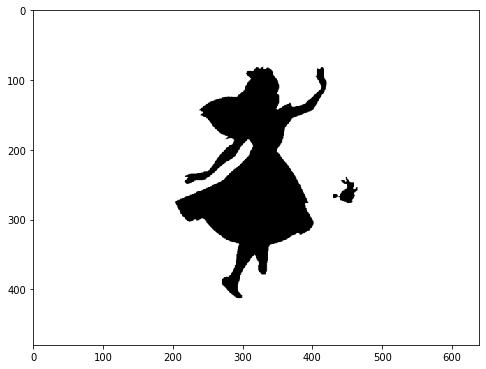

In [85]:
from PIL import Image  # 이미지 모양으로 wordcloud 위해 단색화

alice_mask = np.array(Image.open("data/wordcloud/alice_mask.png"))  # 이미지의 수치화(이미지 2차원 + 색상 1차원 = 3차원 배열)
alice_mask

plt.figure(figsize=(8,8))
plt.imshow(alice_mask)

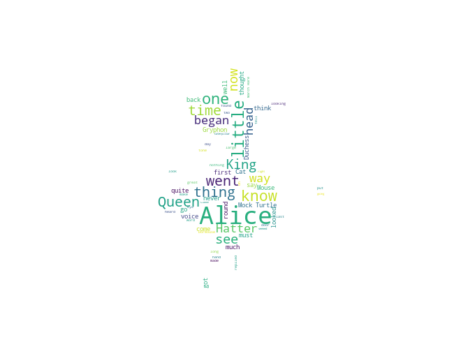

In [94]:
text = open("data/wordcloud/alice.txt").read()
text

stopwords = set(STOPWORDS)
stopwords.add("said")  # 필요없는 단어 목록에 "said" 추가

wc = WordCloud(mask=alice_mask, stopwords=stopwords, background_color="white").generate(text)
    # mask 옵션 통해 엘리스 프레임에 text 출력. stopwords 옵션 통해 필요없는 단어 제거
wc.words_

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")

In [95]:
# 파이썬 한국어 : http://konlpy.org/ko/latest

!pip install konlpy

In [102]:
from konlpy.tag import Twitter
from konlpy.corpus import kolaw
import nltk  # 자연어 처리

3882
3269


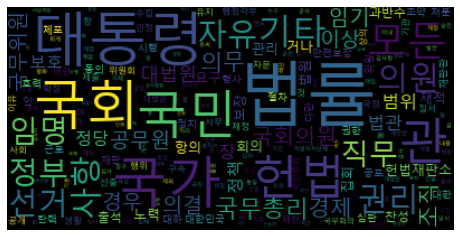

In [107]:
ko_text = kolaw.open("constitution.txt").read()
ko_text

stop_words = ["제", "월", "일", "조", "수", "때", "그", "이", "바", "및", "안", "정", "위"]  # 제거 단어 리스트

t = Twitter()
token_ko = t.nouns(ko_text)  # 명사형의 텍스트만 분리
print(len(token_ko))

token_ko = [each_word for each_word in token_ko if each_word not in stop_words]  
    # 반복문과 조건문 통해 token_ko에 포함된 stop_words 제거
print(len(token_ko))

ko = nltk.Text(token_ko, name="대한민국 헌법")
ko.vocab()  # 각 단어들의 대한 빈도수
data = ko.vocab().most_common(500)  # 이 중 가장 많은 순서대로 500개 추출
data

tmp_data = dict(data)

wc = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(tmp_data)
    # font_path : 폰트 설정(한글 출력은 따로 폰트 설정 필요)

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")